In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# debsable warnings
import warnings
warnings.filterwarnings('ignore')

# change directory
os.chdir("../")

# print current directory
os.getcwd()

'C:\\Users\\PICHAU\\780_Projeto1_MarioHenriqueRomagnaCesa'

In [2]:
df = pd.read_csv('../COVID.csv') #Leitura dos dados em CSV
df = df.drop(['Unnamed: 0'], axis=1) #Remoção da coluna inicial por ser repetida

In [3]:
df.head() #Verificação inicial dos dados, com excessão da idade, todos são binarios

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [4]:
df.info() #Descrição básica dos tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [5]:
df.isnull().sum() #Verificação de Nulos

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

In [6]:
z = np.abs(stats.zscore(df['age']))                                                           #Faz um z-score da coluna Age
print(f' Idade Minima Outlier: {df.age[z > 3].min()} anos')                                   #Imprime idade minima dos outiliers
print(f' Idade Máxima Outlier: {df.age[z > 3].max()} anos')                                   #Imprime idade máxima dos outiliers
print(f' Numero de Outlier: {df.age[z > 3].count()}')                                         #Conta numero de outliers
print(f' Os outliers representam : {(df.age[z > 3].count()/df.age.count())*100} % dos dados') #Imprime o percentual que outiliers representam de todos os dados

 Idade Minima Outlier: 93 anos
 Idade Máxima Outlier: 120 anos
 Numero de Outlier: 886
 Os outliers representam : 0.17730922248104833 % dos dados


In [7]:
df_modif = df.drop(index = df.age[z > 3].index)      #Remove os outliers

In [8]:
df_modif_1 = df_modif.dropna(subset={'diabetes','copd','asthma','pneumonia','inmsupr', 'hypertension','other_disease', 'cardiovascular', 'obesity', 'renal_chronic','tobacco'})
#Droprando NANs com tamanho irrelevante perante os dados

In [9]:
df_modif_1['pregnancy'] = df_modif_1.pregnancy.fillna(0) #preenchendo 0 por apenas os homens não possuiam dados
df_modif_1['intubed'] = df_modif_1.intubed.fillna(0) #Apenas os que foram intubados possuem dados
df_modif_1['icu'] = df_modif_1.icu.fillna(0) #Apenas os que foram pra UTI possuem dados

In [10]:
df_modif_1.isnull().sum()

sex                         0
patient_type                0
intubed                     0
pneumonia                   0
age                         0
pregnancy                   0
diabetes                    0
copd                        0
asthma                      0
inmsupr                     0
hypertension                0
other_disease               0
cardiovascular              0
obesity                     0
renal_chronic               0
tobacco                     0
contact_other_covid    152277
covid_res                   0
icu                         0
dtype: int64

In [11]:
df_corr = df_modif_1.corr()    #Calcula a correlação

<AxesSubplot:>

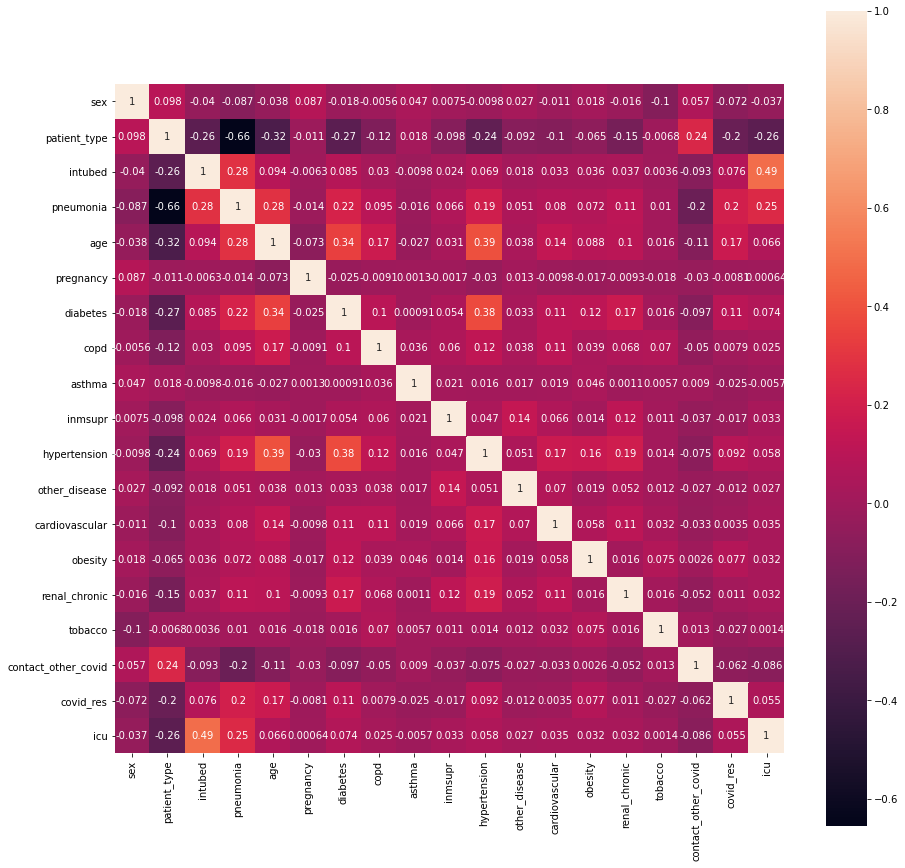

In [12]:
fig, ax = plt.subplots(figsize=(15,15))                    #Plotagem do heatmap de correlaçõa
sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            annot=True, square=True)

In [13]:
df_sep = df_modif_1.groupby('covid_res') #Analise separada de correlação das variaves em paciente testados positivo e negativo

In [14]:
df_sep.get_group(0).corr().head(5) # Correlação do grupo negativo para COVID

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,1.000000,0.064396,-0.023964,-0.056933,-0.010682,0.084566,-0.013308,-0.011795,0.042469,0.002197,-0.011516,0.022786,-0.013203,0.023669,-0.018386,-0.111504,0.035303,NaN,-0.025781
patient_type,0.064396,1.000000,-0.234975,-0.602534,-0.205401,-0.027686,-0.239593,-0.157096,0.007969,-0.142969,-0.212387,-0.135366,-0.132091,-0.030292,-0.190842,-0.014297,0.216692,NaN,-0.264328
intubed,-0.023964,-0.234975,1.000000,0.254413,0.034243,-0.004473,0.059649,0.031262,-0.006807,0.039242,0.047922,0.036236,0.042256,0.015659,0.043284,0.005955,-0.079492,NaN,0.458245
pneumonia,-0.056933,-0.602534,0.254413,1.000000,0.181817,-0.007754,0.187804,0.123161,-0.007312,0.097977,0.161957,0.082321,0.102153,0.037190,0.134046,0.015756,-0.167954,NaN,0.240840
age,-0.010682,-0.205401,0.034243,0.181817,1.000000,-0.064691,0.324203,0.191317,-0.021699,0.033456,0.380957,0.037972,0.140796,0.096509,0.114196,0.032485,-0.052993,NaN,0.018081


In [15]:
df_sep.get_group(1).corr().head(5) # Correlação do grupo positivo para COVID

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,1.000000,0.106617,-0.044849,-0.091691,-0.046967,0.088830,-0.006695,0.002967,0.049063,0.012193,0.005889,0.029934,-0.007177,0.024408,-0.011541,-0.100263,0.079409,NaN,-0.040502
patient_type,0.106617,1.000000,-0.259016,-0.667446,-0.395194,0.001184,-0.259854,-0.093391,0.019330,-0.066518,-0.237633,-0.059710,-0.081966,-0.067113,-0.121045,-0.011042,0.257068,NaN,-0.244363
intubed,-0.044849,-0.259016,1.000000,0.284334,0.123260,-0.007161,0.089312,0.029083,-0.009879,0.016247,0.073931,0.007606,0.029125,0.039966,0.033747,0.005838,-0.101489,NaN,0.504141
pneumonia,-0.091691,-0.667446,0.284334,1.000000,0.333125,-0.018778,0.219220,0.076018,-0.016592,0.049567,0.194762,0.032954,0.066709,0.073370,0.090106,0.016987,-0.220512,NaN,0.245474
age,-0.046967,-0.395194,0.123260,0.333125,1.000000,-0.082901,0.328676,0.155417,-0.026153,0.036558,0.394071,0.043352,0.131758,0.054782,0.092709,0.003836,-0.163196,NaN,0.092807


<AxesSubplot:>

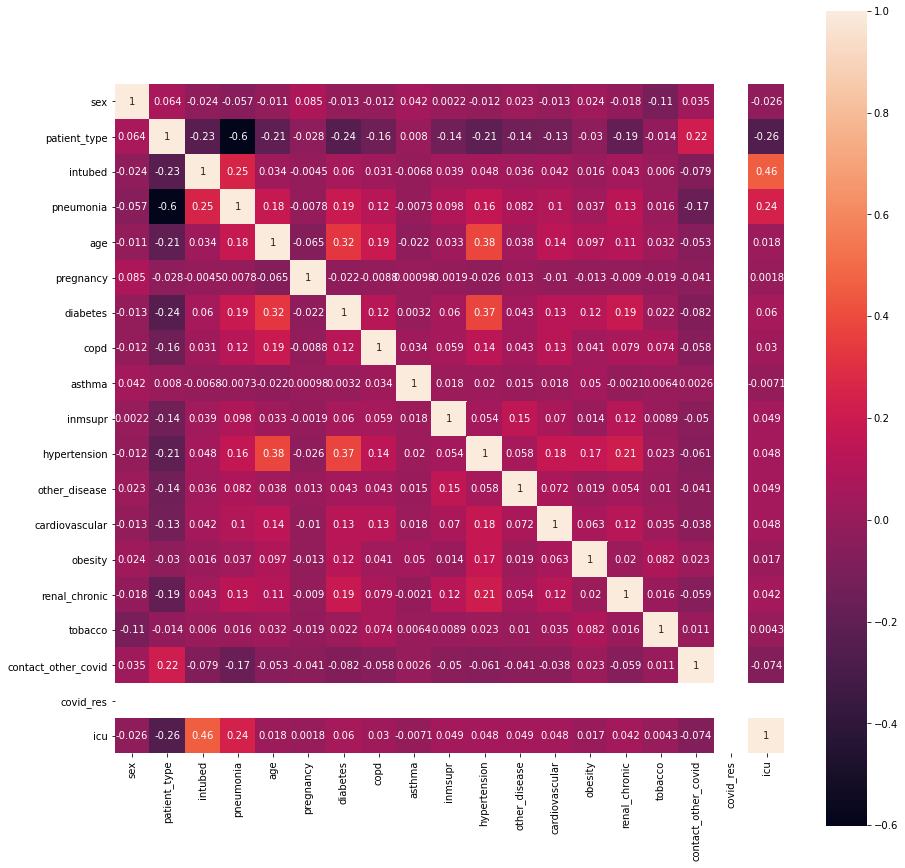

In [16]:
fig, ax = plt.subplots(figsize=(15,15))                     #Plotagem do heatmap de correlaçõa do grupo negativo pra covid
sns.heatmap(df_sep.get_group(0).corr(),
            xticklabels=df_sep.get_group(0).corr().columns,
            yticklabels=df_sep.get_group(0).corr().columns,
            annot=True,
            square=True)

<AxesSubplot:>

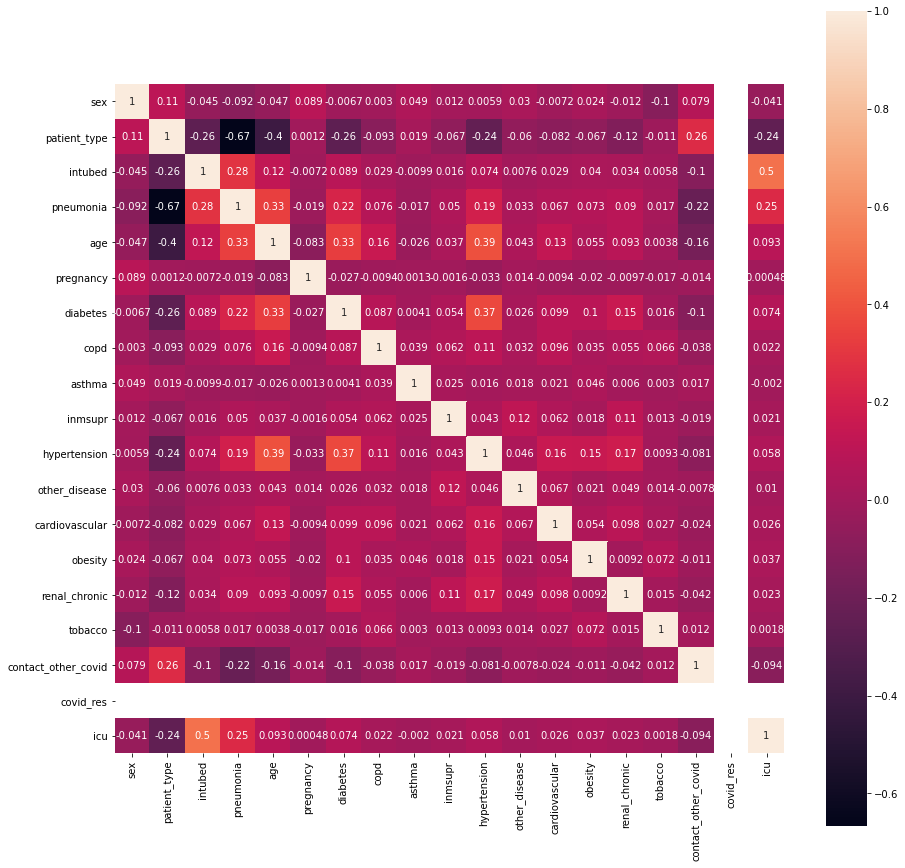

In [17]:
fig, ax = plt.subplots(figsize=(15,15))                     #Plotagem do heatmap de correlaçõa do grupo positivo pra covid
sns.heatmap(df_sep.get_group(1).corr(), 
            xticklabels=df_sep.get_group(1).corr().columns, 
            yticklabels=df_sep.get_group(1).corr().columns, 
            annot=True, 
            square=True)

In [18]:
faixas_etarias = np.arange(0, df_modif_1['age'].max()+10, 20)          #Cria um array para categorização de faixas etárias
df_modif_1['age_cat'] = pd.cut(x=df_modif_1['age'], bins=faixas_etarias) #Adiciona ao dataframe separação por faixas etárias

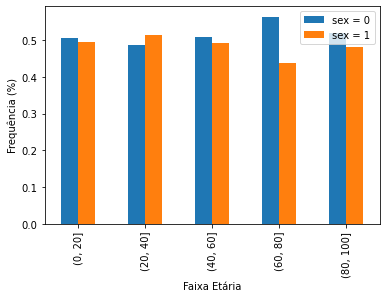

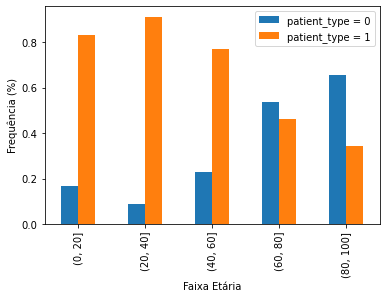

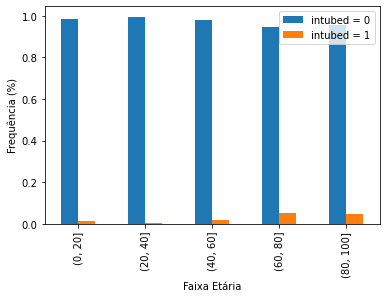

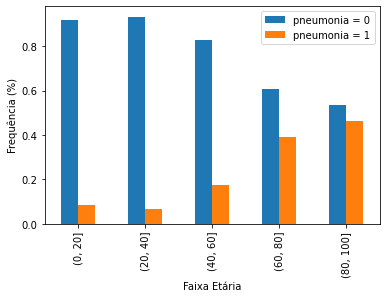

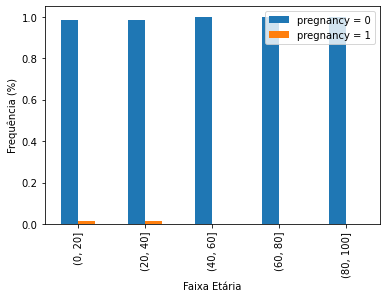

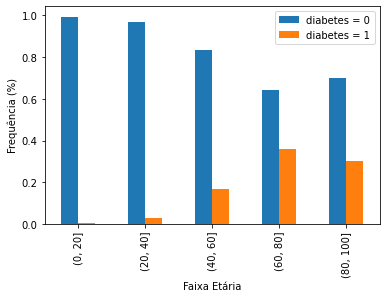

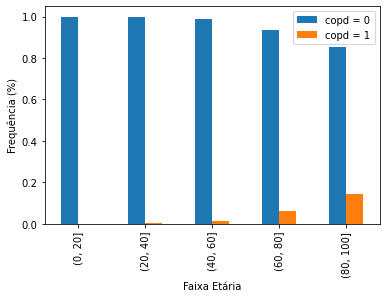

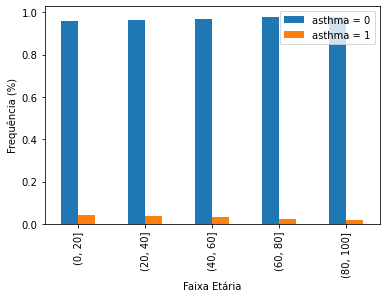

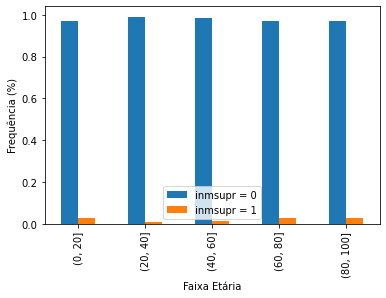

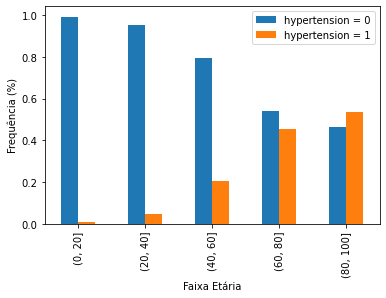

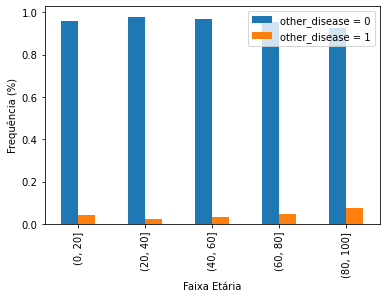

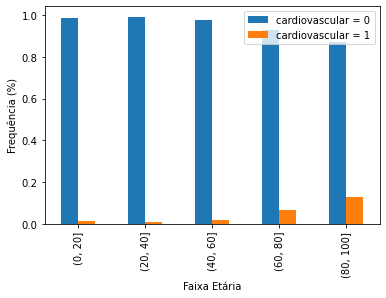

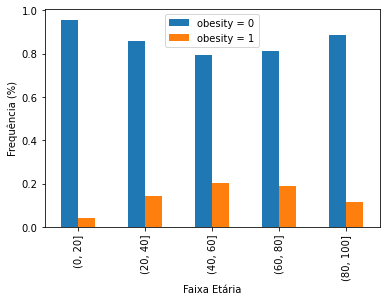

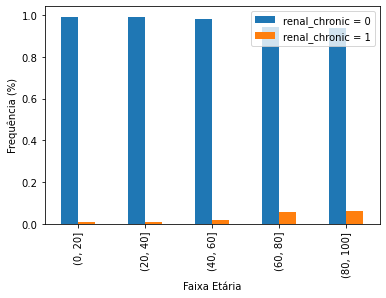

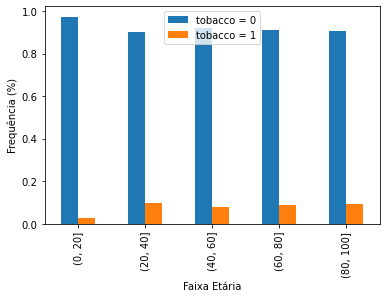

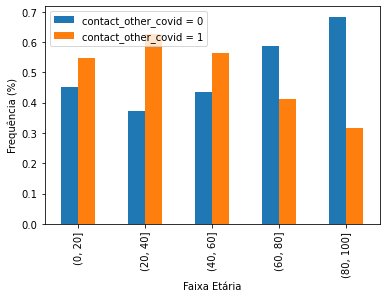

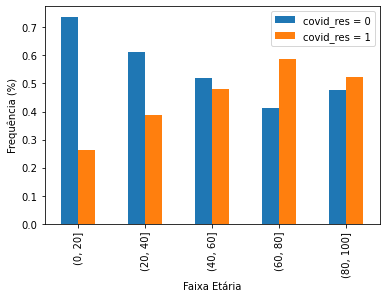

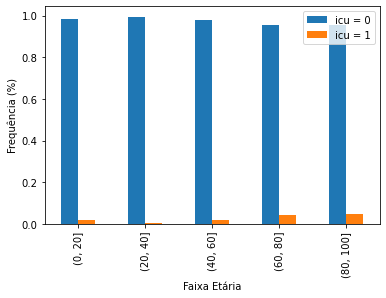

In [19]:
grouped = df_modif_1.groupby(['age_cat'], sort=False) #Imprime o valor de frequencia por faixa etaria
for i in df_modif_1.columns:
    if i != 'age_cat' and i != 'age':
        counts = grouped[i].value_counts(normalize=True, sort=False)
        df_sub = pd.DataFrame(counts)
        ax = df_sub.unstack(level=i).plot(kind='bar')
        ax.set_xlabel('Faixa Etária')
        ax.set_ylabel('Frequência (%)')
        ax.legend([f'{i} = 0', f'{i} = 1' ])

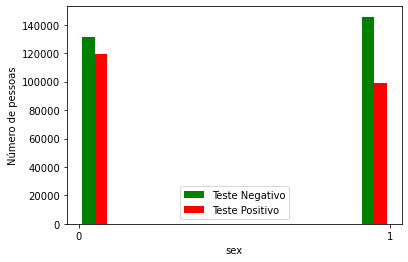

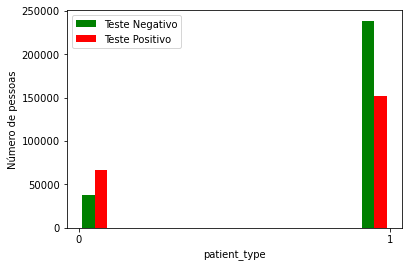

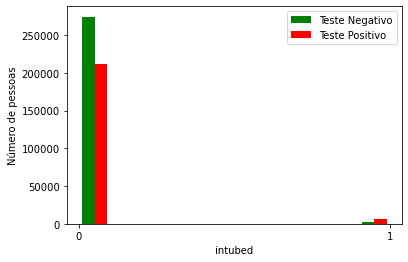

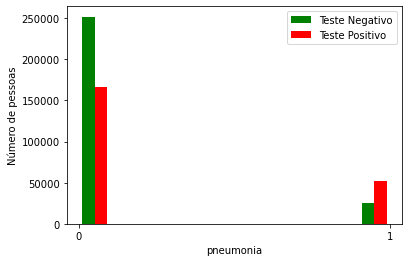

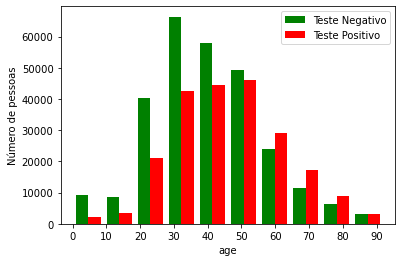

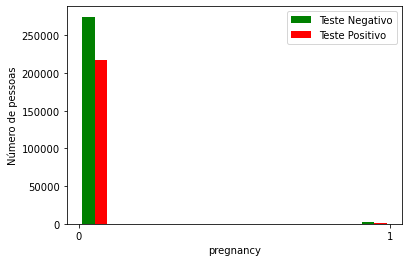

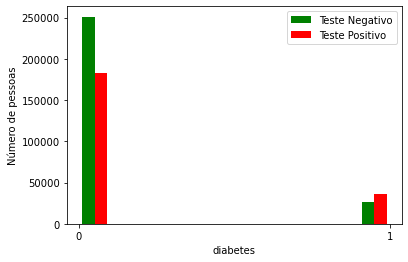

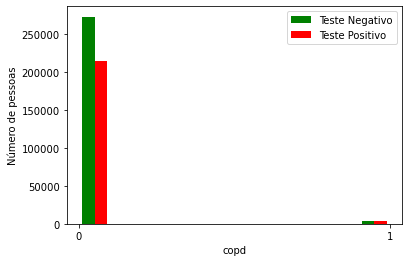

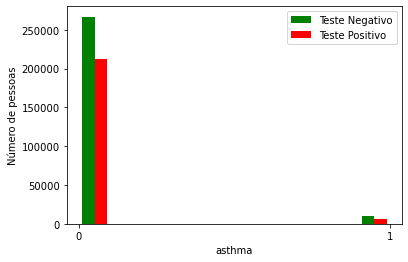

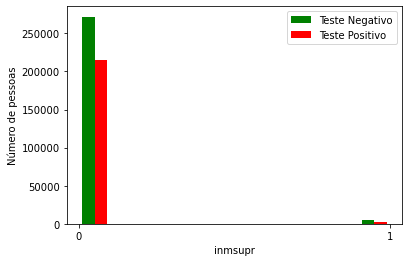

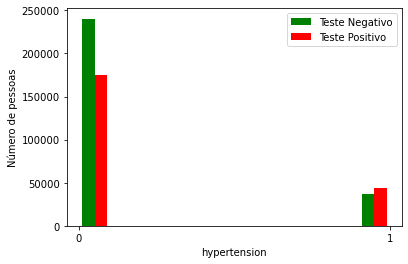

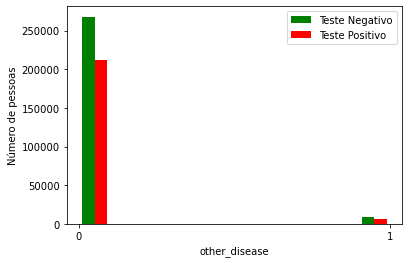

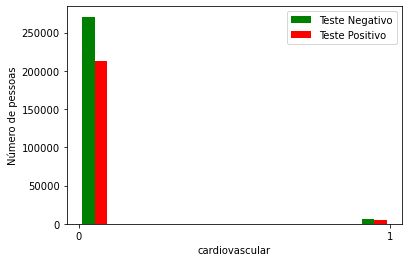

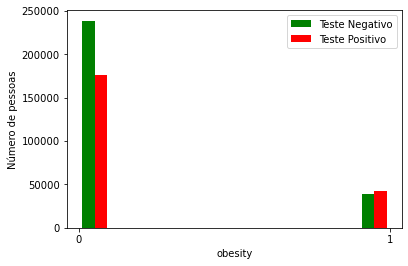

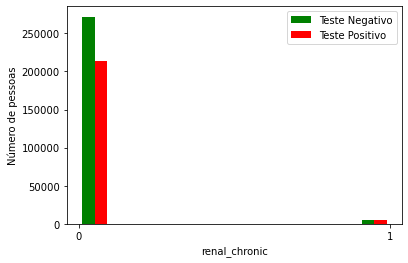

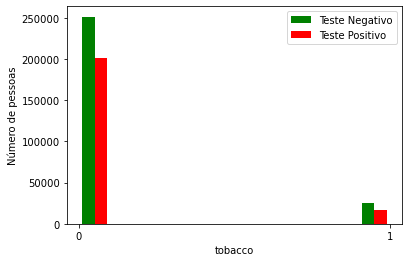

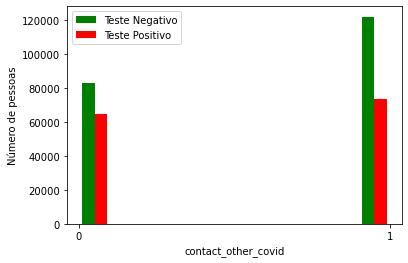

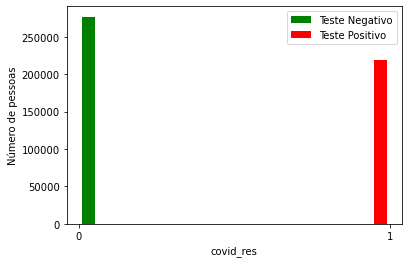

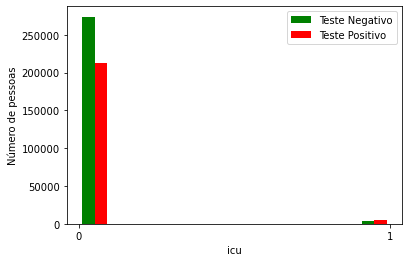

In [20]:
for value in df_modif_1[df_modif_1.covid_res == 0].columns: #imprime numero de contagens por teste positivo
    if value != 'age_cat' and value != 'age':
        plt.xlabel(f'{value}')
        plt.ylabel('Número de pessoas')
        plt.xticks([0,1])
        plt.hist([df_modif_1[df_modif_1.covid_res == 0][value],df_modif_1[df_modif_1.covid_res == 1][value]], color=['green','red'], label=['Teste Negativo','Teste Positivo'])
        plt.legend()
        plt.show()
    if value == 'age':
        plt.xlabel(f'{value}')
        plt.ylabel('Número de pessoas')
        plt.xticks(range(0,100,10))
        plt.hist([df_modif_1[df_modif_1.covid_res == 0][value],df_modif_1[df_modif_1.covid_res == 1][value]], color=['green','red'], label=['Teste Negativo','Teste Positivo'])
        plt.legend()
        plt.show()

In [21]:
df_modif_1.to_csv('manipulated_covid_data.csv') #Salva em CSV